# Breast Cancer Data Analysis
This project analyses the breast cancer dataset available with the Scikit Learn library.

## Loading the data

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer 
data = load_breast_cancer()
data_df = pd.DataFrame(data = data.data, 
                       columns = data.feature_names)
y = data['target']#The target column with values 0 and 1
print(data['target_names'])

['malignant' 'benign']


## Exploring the data

In [37]:
data_df.shape#Displays no. of rows and columns

(569, 30)

In [38]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

All features are of type float - so no categorical features. Also, there seems to be no missing values.

In [40]:
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Observations made:
1. The scale of features are not the same. May need to standardise.
2. Some features such as mean area, worst area etc have a high standard deviation, indicating that the variance of data is high

In [42]:
#Checking for null values
data_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

No null values

### Feature analysis

C:\Users\Anisha\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


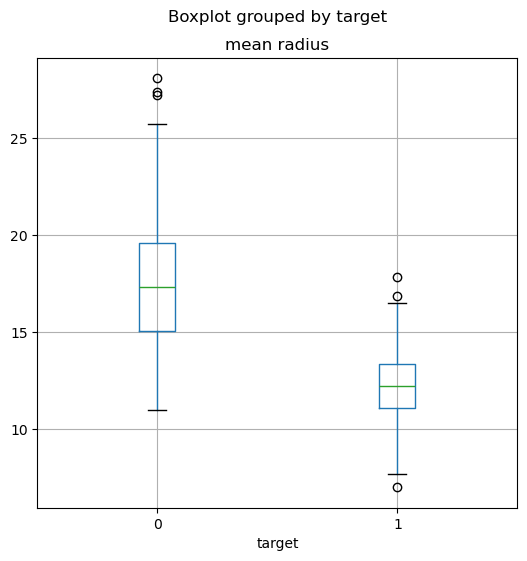

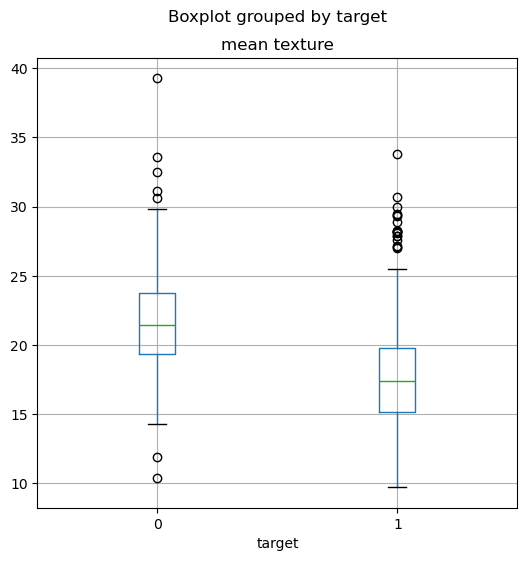

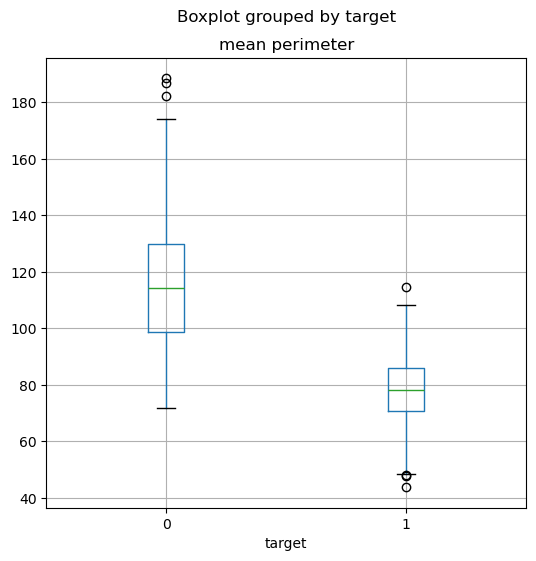

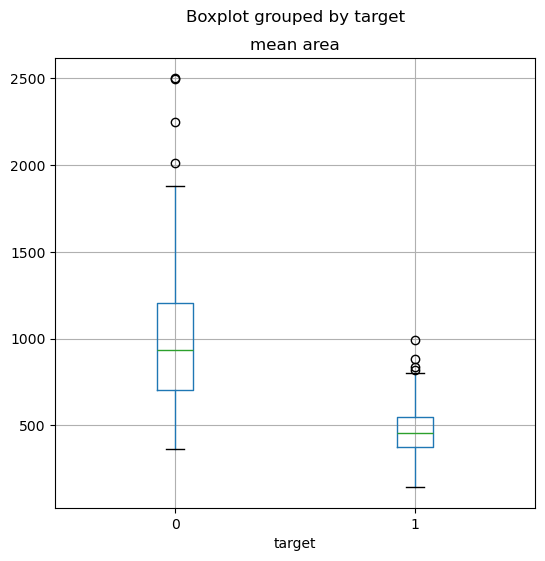

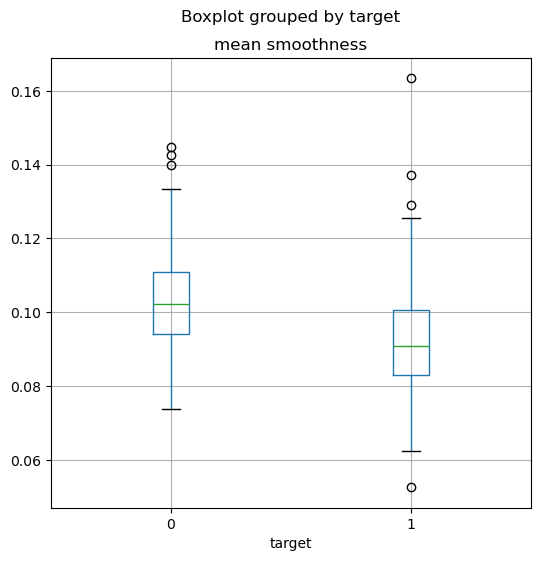

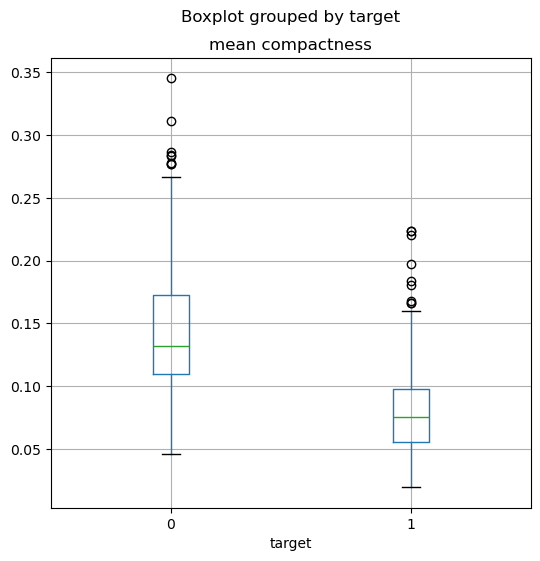

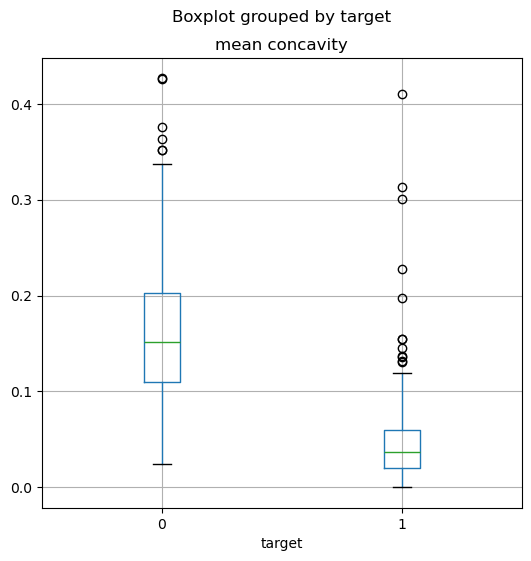

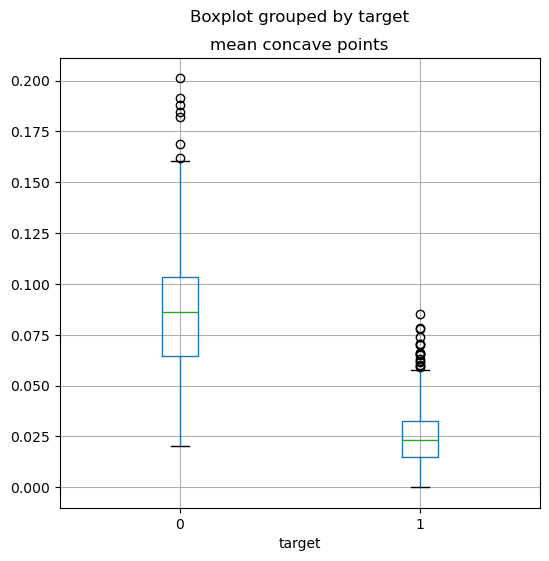

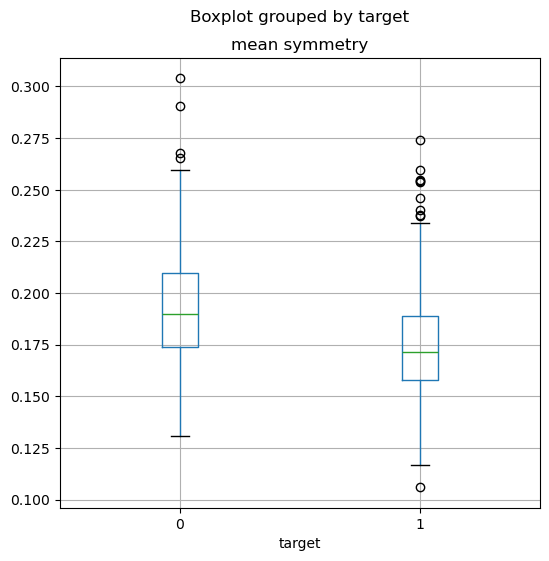

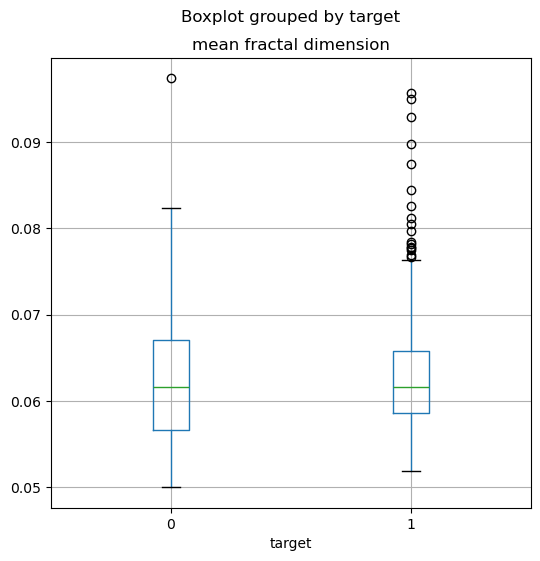

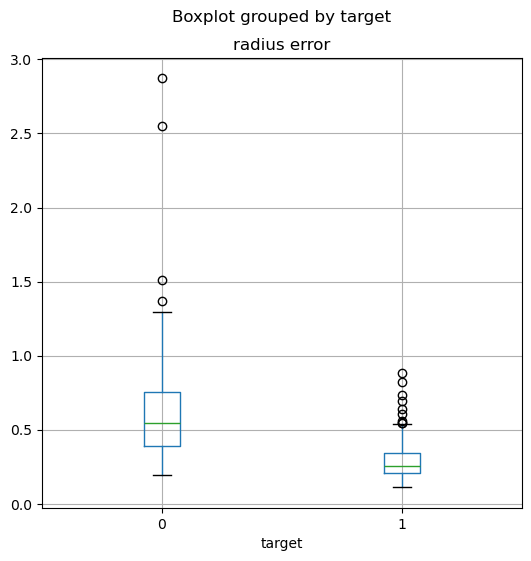

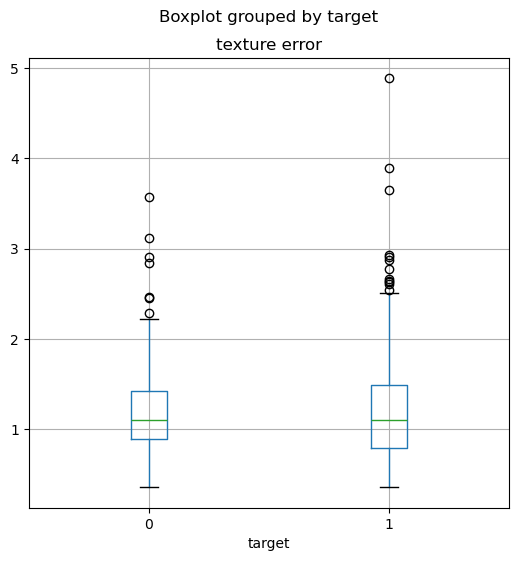

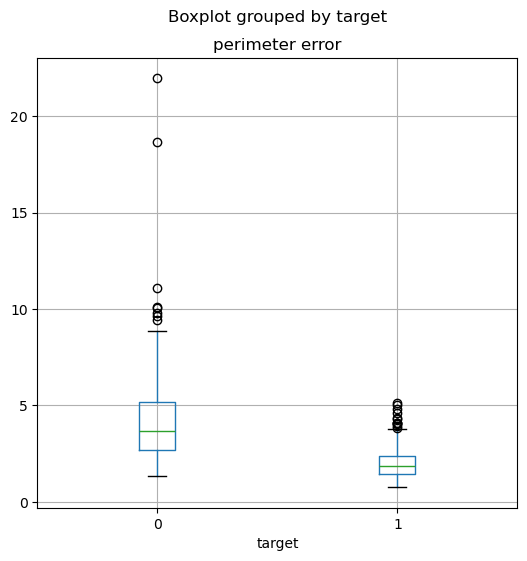

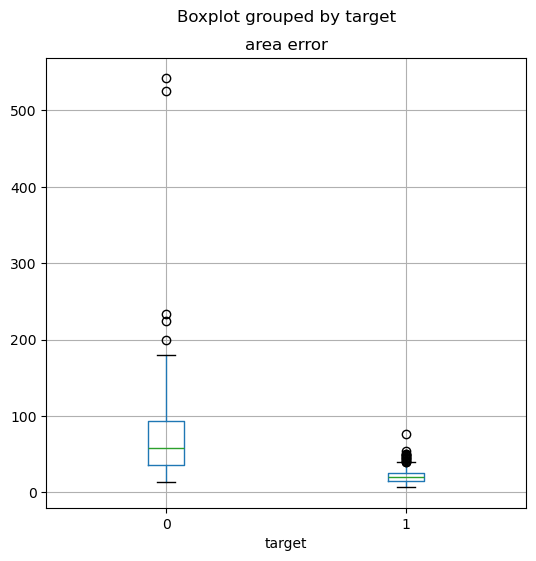

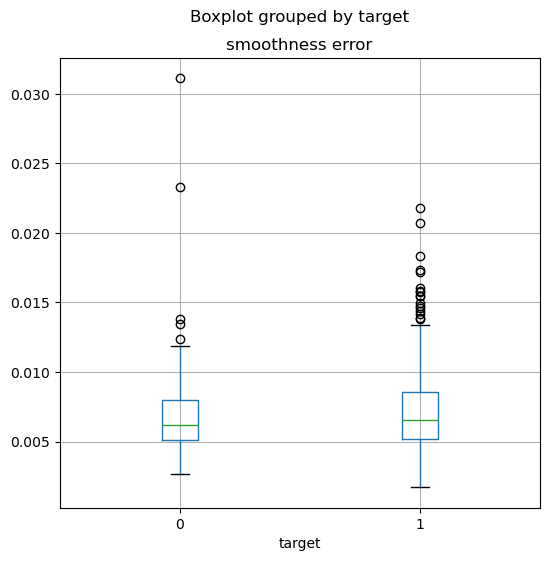

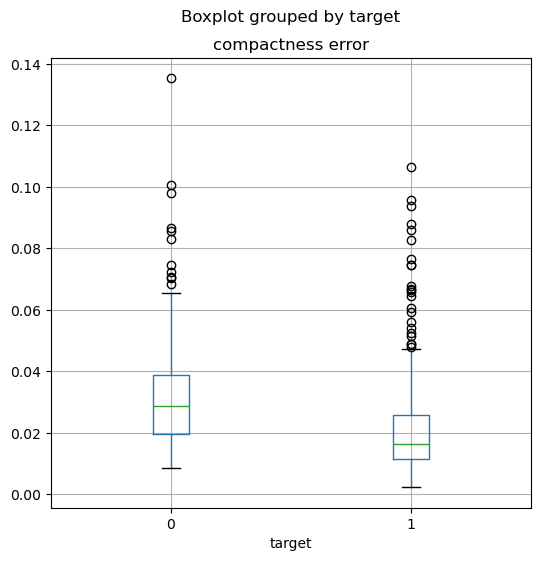

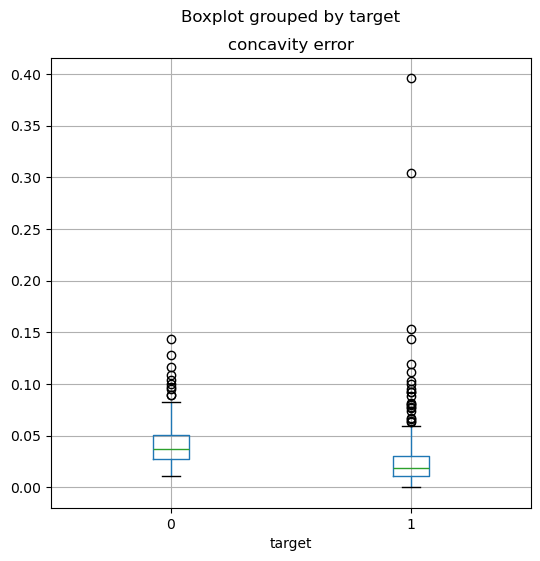

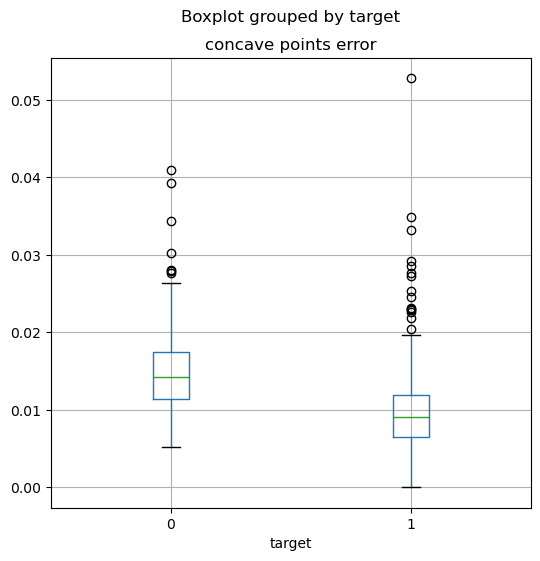

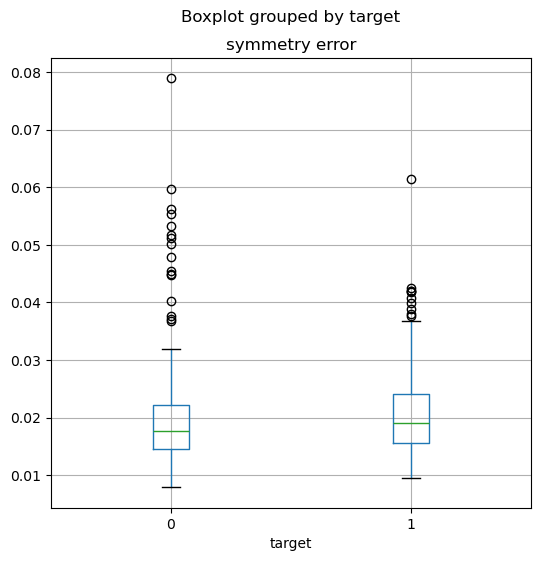

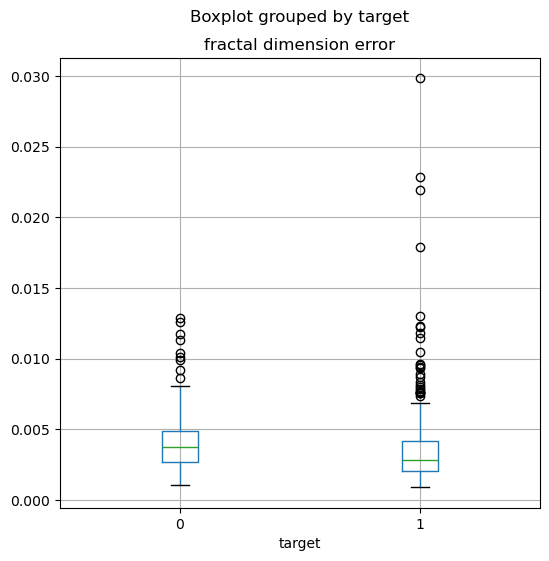

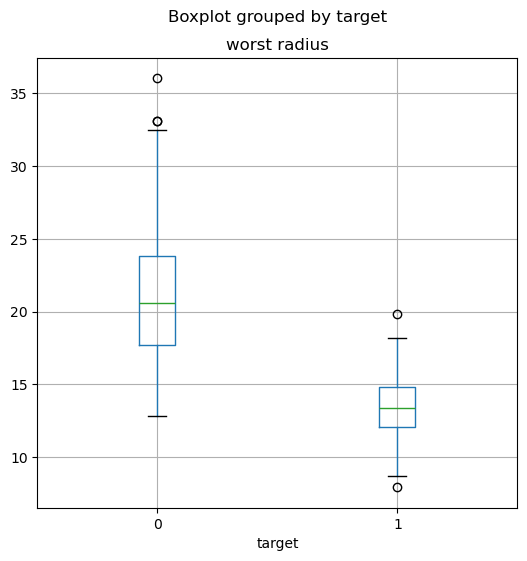

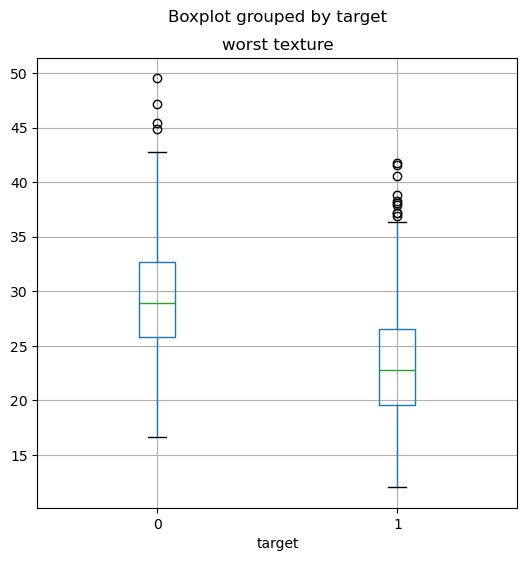

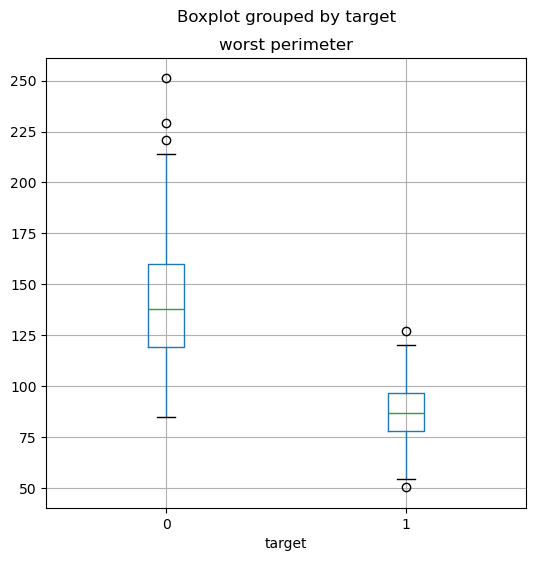

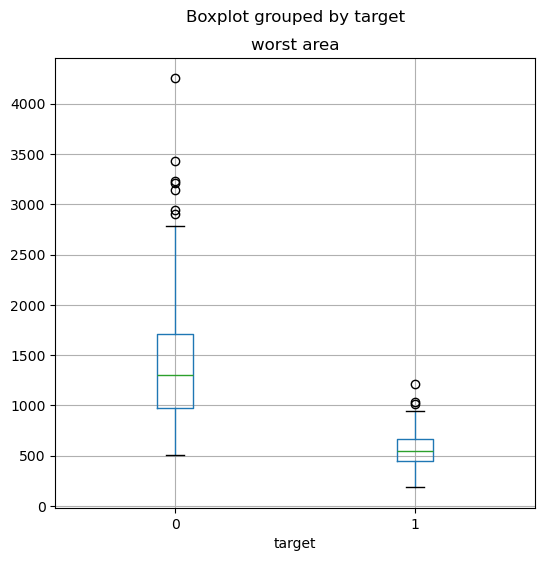

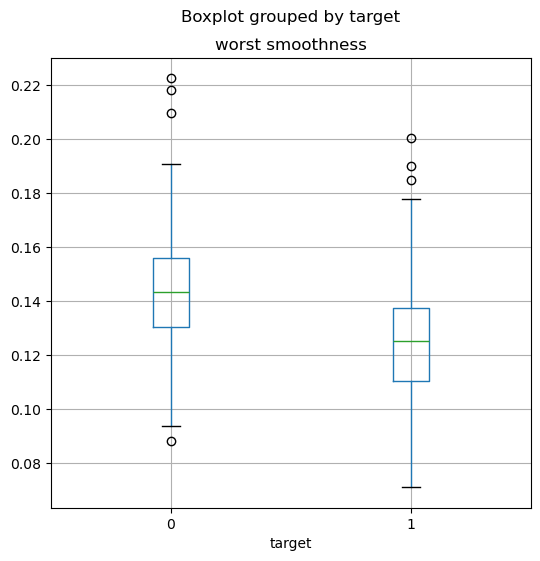

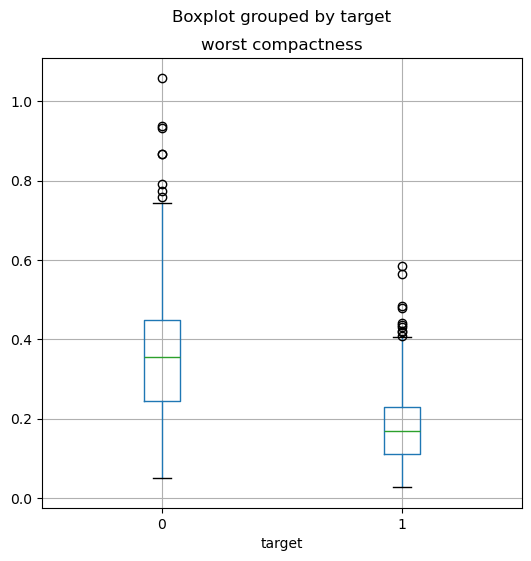

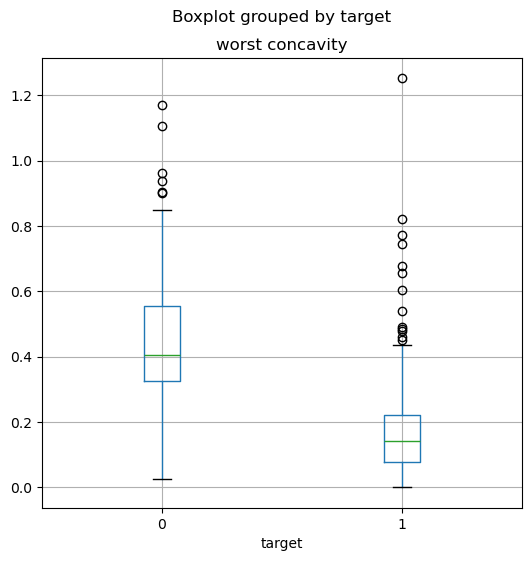

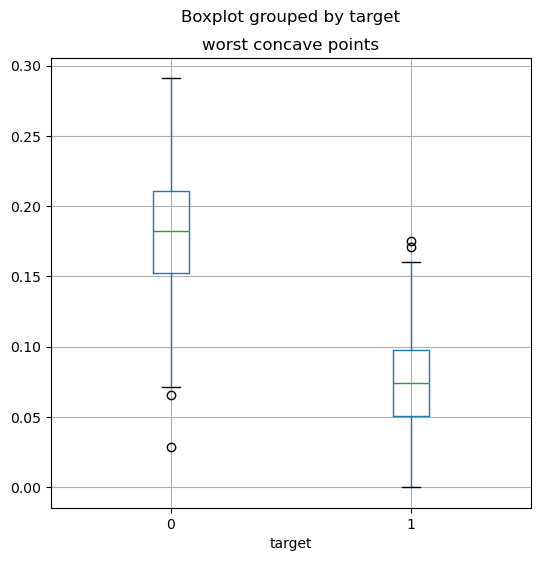

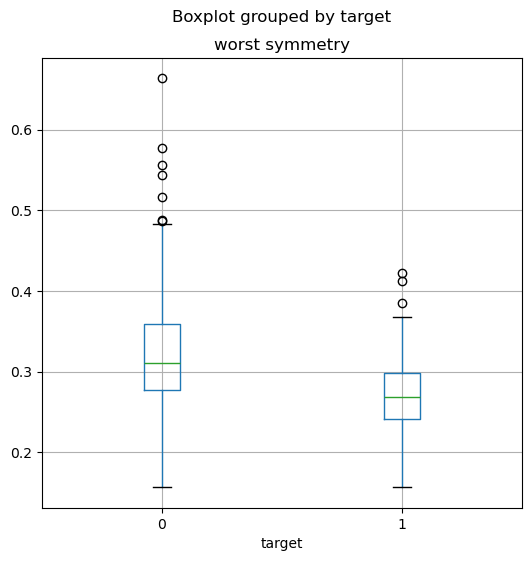

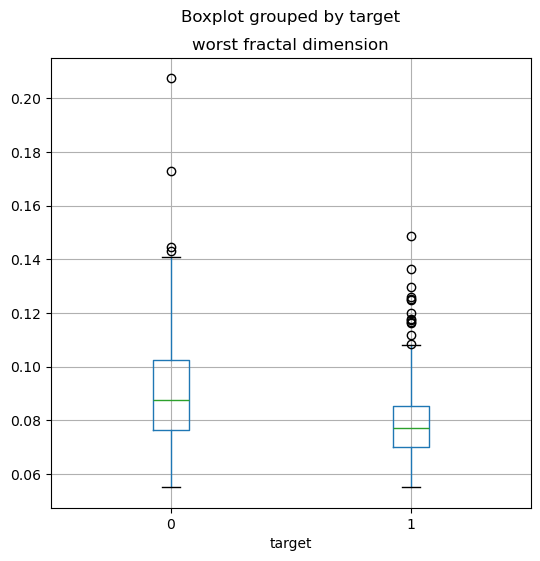

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline
combined_df=data_df.copy()
combined_df['target']=y

for col in data_df.columns:
    combined_df.boxplot(column=col,by='target',figsize=(6,6))
    plt.title(col)
plt.show()


Observations:
1. In almost all features, outliers are present. Hopefully, scaling the data may help
2. worst_concave_points,worst_area,worst_perimeter,mean_area, mean_perimeter etc are the features that shows considerable difference in mean for the 2 classes.

## Training

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Train_test split
X_train,X_test,y_train,y_test = train_test_split(data_df,y,test_size=0.3,random_state=0)

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)


In [49]:
#Training 
reg=0.01
model = LogisticRegression(C=1/reg,solver='liblinear',).fit(X_train_scaled,y_train)

## Evaluation

In [51]:
predictions = model.predict(X_test_scaled)

In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\nPrecision = ",precision_score(y_test,predictions))
print("\nRecall = ",recall_score(y_test,predictions))

Accuracy =  0.935672514619883

Precision =  0.9619047619047619

Recall =  0.9351851851851852


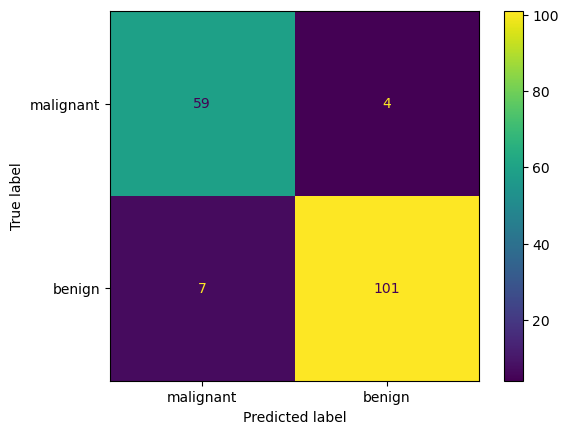

In [53]:
#Displaying Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=data.target_names)
disp.plot();
plt.show()

The model is fairly good with an accuracy and recal score of 93%

## Trying other models

Here, we are creating a pipeline and training the data using different models. Then, we select the best model and do testing

In [57]:
#Creating a table to store the performance of each model
table = pd.DataFrame({'model': ['Logistic Regression'],
                        'precision': [0.9619047619047619],
                        'recall': [0.9351851851851852],
                        'accuracy': [0.935672514619883],
                        },
                       )
table

,model,precision,recall,accuracy
0,Logistic Regression,0.961905,0.935185,0.935673


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



#SVM Classifier
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_scaled, y_train)
svm_predictions = svm_model_linear.predict(X_test_scaled)
new_row=pd.DataFrame({'model': ['Support Vector Machine'],
                        'precision': [precision_score(y_test,svm_predictions)],
                        'recall': [recall_score(y_test,svm_predictions)],
                        'accuracy': [accuracy_score(y_test,svm_predictions)],
                        },
                       )
table=pd.concat([table,new_row],ignore_index=True)

#Decision tree classifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train_scaled, y_train)
dtree_predictions = dtree_model.predict(X_test_scaled)
new_row=pd.DataFrame({'model': ['Decision Tree'],
                        'precision': [precision_score(y_test,dtree_predictions)],
                        'recall': [recall_score(y_test,dtree_predictions)],
                        'accuracy': [accuracy_score(y_test,dtree_predictions)],
                        },
                       )
table=pd.concat([table,new_row],ignore_index=True)

#Naive Bayes
gnb = GaussianNB().fit(X_train_scaled, y_train)
gnb_predictions = gnb.predict(X_test_scaled)
new_row=pd.DataFrame({'model': ['Naive Bayes'],
                        'precision': [precision_score(y_test,gnb_predictions)],
                        'recall': [recall_score(y_test,gnb_predictions)],
                        'accuracy': [accuracy_score(y_test,gnb_predictions)],
                        },
                       )
table=pd.concat([table,new_row],ignore_index=True)

#Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
clf.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)
new_row=pd.DataFrame({'model': ['Random Forest'],
                        'precision': [precision_score(y_test,y_pred)],
                        'recall': [recall_score(y_test,y_pred)],
                        'accuracy': [accuracy_score(y_test,y_pred)],
                        },
                       )
table=pd.concat([table,new_row],ignore_index=True)

#Sorting the table wrt descending order of accuracy score
table = table.sort_values(by='accuracy',ascending=False)
print(table)


                    model  precision    recall  accuracy
4           Random Forest   0.972222  0.972222  0.964912
1  Support Vector Machine   0.980952  0.953704  0.959064
0     Logistic Regression   0.961905  0.935185  0.935673
2           Decision Tree   0.961905  0.935185  0.935673
3             Naive Bayes   0.942857  0.916667  0.912281


From the above table, it is clear that random forest model performs the best.

In [100]:
#Trying deep learning on the data
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model
dl_model = create_model()
dl_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)
#test_loss, test_accuracy = dl_model.evaluate(X_test_scaled, y_test, verbose=0)

#print("Accuracy= ",test_accuracy)


Epoch 1/10


C:\Users\Anisha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6282 - loss: 0.7764 - val_accuracy: 0.8875 - val_loss: 0.4520
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9526 - loss: 0.3702 - val_accuracy: 0.9500 - val_loss: 0.2882
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9504 - loss: 0.2328 - val_accuracy: 0.9500 - val_loss: 0.2083
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9616 - loss: 0.1632 - val_accuracy: 0.9625 - val_loss: 0.1601
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9555 - loss: 0.1597 - val_accuracy: 0.9750 - val_loss: 0.1318
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9823 - loss: 0.1028 - val_accuracy: 0.9875 - val_loss: 0.1120
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9872 - loss: 0.0726 - val_accuracy: 0.9875 - val_loss: 0.1010
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9740 - loss: 0.1108 - val_accuracy: 0.9875 - val_loss: 0.

In [110]:
#Testing the deep learning model
y_pred=dl_model.predict(np.array(X_test_scaled))#Prints the probabilities
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[5.5471886e-02],
       [9.4282937e-01],
       [9.9717915e-01],
       [9.8622286e-01],
       [9.9523264e-01],
       [9.8791867e-01],
       [9.9675339e-01],
       [9.9588877e-01],
       [9.9994379e-01],
       [9.9994493e-01],
       [3.5784516e-01],
       [8.8444644e-01],
       [9.9976969e-01],
       [4.9032873e-01],
       [4.2557603e-01],
       [9.8239571e-02],
       [9.6076828e-01],
       [8.8325533e-04],
       [2.7801278e-03],
       [9.2602073e-05],
       [1.6106002e-02],
       [4.9822588e-02],
       [9.5708472e-01],
       [9.9640810e-01],
       [1.0058849e-02],
       [9.9912935e-01],
       [9.9993986e-01],
       [6.7243930e-03],
       [9.9716043e-01],
       [2.4324933e-04],
       [9.9989396e-01],
       [5.7958714e-03],
       [8.4976095e-01],
       [5.5699665e-02],
       [9.9998975e-01],
       [1.9533938e-02],
       [9.8517781e-01],
       [1.3743709e-02],
       [9.8629636e-01],
       [2.1148473e-02],
       [5.6793785e-01],
       [9.997521

In [116]:
#To get the class labels

classes_test_data=(y_pred > 0.5).astype("int32")
#classes_test_data = np.array(classes_test_data)
classes_test_data

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [124]:
print(accuracy_score(y_test,classes_test_data))

0.9473684210526315


In [122]:
#Computing accuracy,recall and precision for the deep learning model and including the result in the table
new_row=pd.DataFrame({'model': ['Multilayer Perceptron'],
                        'precision': [precision_score(y_test,classes_test_data)],
                        'recall': [recall_score(y_test,classes_test_data)],
                        'accuracy': [accuracy_score(y_test,classes_test_data)],
                        },
                       )
table=pd.concat([table,new_row],ignore_index=True)

#Sorting the table wrt descending order of accuracy score
table = table.sort_values(by='accuracy',ascending=False)
print(table)

                    model  precision    recall  accuracy
0           Random Forest   0.972222  0.972222  0.964912
1  Support Vector Machine   0.980952  0.953704  0.959064
5   Multilayer Perceptron   0.962617  0.953704  0.947368
2     Logistic Regression   0.961905  0.935185  0.935673
3           Decision Tree   0.961905  0.935185  0.935673
4             Naive Bayes   0.942857  0.916667  0.912281


For the current execution, accuracy and recall of Random Forest model are the highest. But precision is highest for Support Vector Machine. 

### Finding out the features affecting the classification
In decision tree classifier, there is an attribute called 

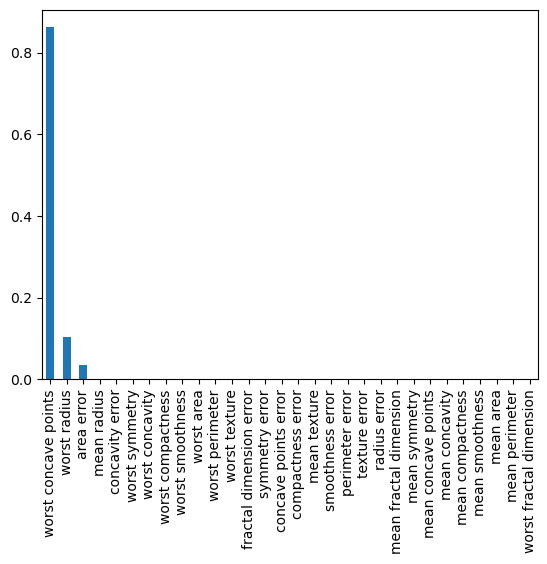

In [71]:
importances = dtree_model.feature_importances_

f_importances = pd.Series(importances, index=data_df.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
f_importances.plot.bar(ax=ax)
plt.show()

It seems that the only factors affecting the classification are worst_concave_points(most important feature),worst_radius and area_error